In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

import xgboost as xg
from sklearn.ensemble import RandomForestRegressor

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers
import tensorflow.keras.callbacks
import tensorflow.keras.backend as K

from sklearn.svm import SVR

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df_json = pd.read_json("new_challenge3_dataset.json")


In [3]:
df1 = df_json.fillna(df_json.mean(numeric_only=True))

In [4]:
df1.shape


(111696, 20)

In [5]:
df1.head(6)

,area,areaCode,item,prod_unit,y0__AgriProd,y0__AnnualFeedProd,y0__AnnualFoodProd,y0__AnnualAgriLosses,y0__GDP,y0__GrossAgriVal,y0__Pesticide,y0__Fire,y1__AgriProd,y1__AnnualFeedProd,y1__AnnualFoodProd,y1__AnnualAgriLosses,y1__GDP,y1__GrossAgriVal,y1__Pesticide,y1__Fire
8,Armenia,1,Barley,tonnes,9.599992e+06,78418.006068,328531.21691,35323.183912,951550.674802,9652.643977,68230.625504,3.479493e+07,9.732991e+06,79489.473794,331406.171654,35674.323792,0.0,9945.248905,68632.584276,3.465965e+07
9,Armenia,1,Barley,tonnes,9.599992e+06,78418.006068,328531.21691,35323.183912,0.000000,9652.643977,68230.625504,3.479493e+07,9.732991e+06,79489.473794,331406.171654,35674.323792,0.0,9945.248905,68632.584276,3.465965e+07
10,Armenia,1,Barley,tonnes,9.599992e+06,78418.006068,328531.21691,35323.183912,0.000000,9652.643977,68230.625504,3.479493e+07,9.732991e+06,79489.473794,331406.171654,35674.323792,0.0,9945.248905,68632.584276,3.465965e+07
11,Armenia,1,Barley,tonnes,9.599992e+06,78418.006068,328531.21691,35323.183912,0.000000,9652.643977,68230.625504,3.479493e+07,9.732991e+06,79489.473794,331406.171654,35674.323792,0.0,9945.248905,68632.584276,3.465965e+07
12,Armenia,1,Barley,tonnes,9.599992e+06,78418.006068,328531.21691,35323.183912,0.000000,9652.643977,68230.625504,3.479493e+07,9.732991e+06,79489.473794,331406.171654,35674.323792,0.0,9945.248905,68632.584276,3.465965e+07
13,Armenia,1,Barley,tonnes,9.599992e+06,78418.006068,328531.21691,35323.183912,0.000000,9652.643977,68230.625504,3.479493e+07,9.732991e+06,79489.473794,331406.171654,35674.323792,0.0,9945.248905,68632.584276,3.465965e+07


In [6]:
ignore_vars = ['y1__AgriProd','area', 'y1__AnnualFeedProd', 'y1__AnnualFoodProd', 'y1__AnnualAgriLosses','y1__GDP', 'y1__GrossAgriVal', 'y1__Pesticide', 'y1__Fire' ]

# Find real and categorical variables
cols = df1.columns
cat_vars = []
real_vars = []

for col in cols:
    
    if not (col in ignore_vars):
        if df1.dtypes[col]  == 'object':
            cat_vars.append(col)
        else:
            real_vars.append(col)
                
print('Categorical variables = ' + str(cat_vars))
print('')
print('Real variables = ' + str(real_vars))

Categorical variables = ['item', 'prod_unit']

Real variables = ['areaCode', 'y0__AgriProd', 'y0__AnnualFeedProd', 'y0__AnnualFoodProd', 'y0__AnnualAgriLosses', 'y0__GDP', 'y0__GrossAgriVal', 'y0__Pesticide', 'y0__Fire']


In [7]:
df_real = df1[real_vars]
df_cat = df1[cat_vars]

# One-hot encode the categorical variables
df_cat_enc = pd.get_dummies(df_cat, drop_first=True)

In [8]:
df_cat_enc.head()

,"item_Beans, dry",item_Buckwheat,item_Millet,item_Molasses,item_Oats,item_Potatoes,item_Rice,"item_Rice, paddy (rice milled equivalent)",item_Rye,item_Sorghum,item_Sugar Crops Primary,item_Wheat
8,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_cat_enc.shape

(111696, 12)

In [10]:
df_enc = pd.concat((df_real, df_cat_enc), axis=1)
X = np.array(df_enc)
print(X.shape)

xnames = df_enc.columns

(111696, 21)


In [11]:
y = np.array(df1['y1__AgriProd'])

In [12]:
print(xnames[0:10])

Index(['areaCode', 'y0__AgriProd', 'y0__AnnualFeedProd', 'y0__AnnualFoodProd',
       'y0__AnnualAgriLosses', 'y0__GDP', 'y0__GrossAgriVal', 'y0__Pesticide',
       'y0__Fire', 'item_Beans, dry'],
      dtype='object')


In [13]:
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)

In [14]:
# Create the scaler objects
xscal = StandardScaler()
yscal = StandardScaler()

# Fit and transform the training data
Xtr1 = xscal.fit_transform(Xtr)
ytr1 = yscal.fit_transform(ytr[:,None])

# Transform the test data
Xts1 = xscal.transform(Xts)
yts1 = yscal.transform(yts[:,None])

# Linear Regression

In [15]:

# Fit
reg_ls = LinearRegression()
reg_ls.fit(Xtr1, ytr1)

# Training R^2
yhat1_tr = reg_ls.predict(Xtr1)
rsq_tr = r2_score(yhat1_tr, ytr1)
print('Training R^2 = %12.4e' % rsq_tr)

# Test R^2
yhat1_ts = reg_ls.predict(Xts1)
rsq_ts = r2_score(yts1, yhat1_ts)
print('Test R^2     = %12.4e' % rsq_ts)

Training R^2 =   9.9692e-01
Test R^2     =   9.9597e-01


In [16]:
reg_ls = Ridge(alpha=1e-5)
reg_ls.fit(Xtr1, ytr1)
yhat1 = reg_ls.predict(Xts1)
rsq = r2_score(yts1, yhat1)
print('Test R^2     = %f' % rsq)

Test R^2     = 0.995974


In [17]:

simplefilter("ignore", category=ConvergenceWarning)

# Select alpha
alpha = 3e-3

# Create Lasso object and fit on training data
reg = Lasso(alpha=alpha)
reg.fit(Xtr1, ytr1)

# Predict and score on test
yhat1 = reg.predict(Xts1)
rsq = r2_score(yts1, yhat1)

print('Test R^2= %f' % rsq)

Test R^2= 0.995904


# SVR

In [18]:
regressor = SVR(kernel = 'rbf')
regressor.fit(Xtr1, ytr1.ravel())
yhat = regressor.predict(Xts1)

rsq_ts = r2_score(yts1, yhat)
print('Test R^2     = %12.4e' % rsq_ts)

Test R^2     =   7.1767e-01


# Neural Networks

In [19]:
K.clear_session()

In [20]:

nin = Xtr.shape[1]  # dimension of input data
nh = 256   # number of hidden units
nout = 1  
model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,),kernel_initializer='normal',activation='relu', name='hidden'))
model.add(Dense(units=20,kernel_initializer='normal' ,activation='tanh'))
model.add(Dense(units=1,kernel_initializer='normal' ,name='output', activation ='linear'))


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 256)               5632      
                                                                 
 dense (Dense)               (None, 20)                5140      
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 10,793
Trainable params: 10,793
Non-trainable params: 0
_________________________________________________________________


In [22]:

opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='mean_squared_error'
             )

In [23]:
hist = model.fit(Xtr1, ytr1, epochs=10, batch_size=100, validation_data=(Xts1,yts1))

Epoch 1/10
782/782 [==============================] - 6s 5ms/step - loss: 0.4683 - val_loss: 0.2899
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2300 - val_loss: 0.1989
Epoch 3/10
782/782 [==============================] - 4s 4ms/step - loss: 0.1527 - val_loss: 0.1473
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1150 - val_loss: 0.1157
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0940 - val_loss: 0.1066
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0786 - val_loss: 0.0838
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0562 - val_loss: 0.0661
Epoch 8/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0495 - val_loss: 0.0757
Epoch 9/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0431 - val_loss: 0.0465
Epoch 10/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0307 - val_loss: 0.0383

Text(0, 0.5, 'loss')

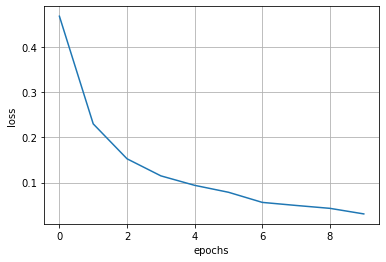

In [24]:
tr_accuracy = hist.history['loss']


plt.plot(tr_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')


In [25]:
# !pip install xgboost

# Random Forest Regressor

In [35]:
model = RandomForestRegressor()
model.fit(Xtr1,ytr1.ravel())

# Getting r2_score on test data
yhat = model.predict(Xts1)
r2 = r2_score(yts1, yhat)
print('Random forest  accuracy = ', r2)

Random forest  accuracy =  0.9960738806617813


# Xgboost

In [34]:
XGBModel = xg.XGBRegressor()
XGBModel.fit(Xtr1,ytr1 , verbose=False)

# Getting r2_score on the test data :
yhat = XGBModel.predict(Xts1)
r2 = r2_score(yts1 , yhat)
print('XGBoost accuracy = ',r2)

XGBoost accuracy =  0.9959694715754389


# Ablation (ignoring area)

In [28]:
ignore_vars = ['areaCode','y1__AgriProd','area', 'y1__AnnualFeedProd', 'y1__AnnualFoodProd', 'y1__AnnualAgriLosses','y1__GDP', 'y1__GrossAgriVal', 'y1__Pesticide', 'y1__Fire' ]

# Find real and categorical variables
cols = df1.columns
cat_vars = []
real_vars = []

for col in cols:
    
    if not (col in ignore_vars):
        if df1.dtypes[col]  == 'object':
            cat_vars.append(col)
        else:
            real_vars.append(col)
                
print('Categorical variables = ' + str(cat_vars))
print('')
print('Real variables = ' + str(real_vars))

df_real = df1[real_vars]
df_cat = df1[cat_vars]

# One-hot encode the categorical variables
df_cat_enc = pd.get_dummies(df_cat, drop_first=True)
                            

df_enc = pd.concat((df_real, df_cat_enc), axis=1)
X = np.array(df_enc)

y = np.array(df1['y1__AgriProd'])


Categorical variables = ['item', 'prod_unit']

Real variables = ['y0__AgriProd', 'y0__AnnualFeedProd', 'y0__AnnualFoodProd', 'y0__AnnualAgriLosses', 'y0__GDP', 'y0__GrossAgriVal', 'y0__Pesticide', 'y0__Fire']


In [29]:
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)


In [30]:
# Create the scaler objects
xscal = StandardScaler()
yscal = StandardScaler()

# Fit and transform the training data
Xtr1 = xscal.fit_transform(Xtr)
ytr1 = yscal.fit_transform(ytr[:,None])

# Transform the test data
Xts1 = xscal.transform(Xts)
yts1 = yscal.transform(yts[:,None])

# Linear Regression with Ablation

In [31]:
# Fit
reg_ls = LinearRegression()
reg_ls.fit(Xtr1, ytr1)

# Training R^2
yhat1_tr = reg_ls.predict(Xtr1)
rsq_tr = r2_score(yhat1_tr, ytr1)
print('Training R^2 = %12.4e' % rsq_tr)

# Test R^2
yhat1_ts = reg_ls.predict(Xts1)
rsq_ts = r2_score(yts1, yhat1_ts)
print('Test R^2     = %12.4e' % rsq_ts)

Training R^2 =   9.9674e-01
Test R^2     =   9.9641e-01


# Ridge Regrssion

In [32]:
reg_ls = Ridge(alpha=1e-5)
reg_ls.fit(Xtr1, ytr1)
yhat1 = reg_ls.predict(Xts1)
rsq = r2_score(yts1, yhat1)
print('Test R^2     = %f' % rsq)

Test R^2     = 0.996413


# XGboost with Ablation

In [33]:
XGBModel = xg.XGBRegressor()
XGBModel.fit(Xtr1,ytr1 , verbose=False)

# Getting r2_score on test data :
yhat = XGBModel.predict(Xts1)
r2 = r2_score(yts1 , yhat)
print('XGBoost validation r2_score = ',r2)

XGBoost validation r2_score =  0.9959694715754389
